In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
os.listdir()

['__notebook__.ipynb']

In [3]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1': 'class', 'v2': 'msg'}, inplace=True)
df

,class,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


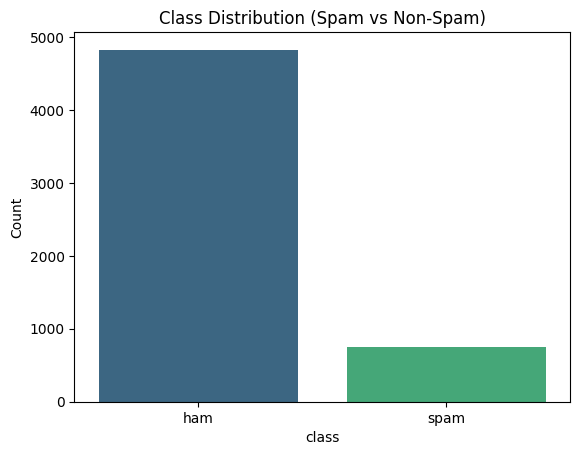

In [7]:
sns.countplot(x='class', data=df, palette="viridis")
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("class")
plt.ylabel("Count")
plt.show()


<ipython-input-8-f63618104bdb>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='class', data=df, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


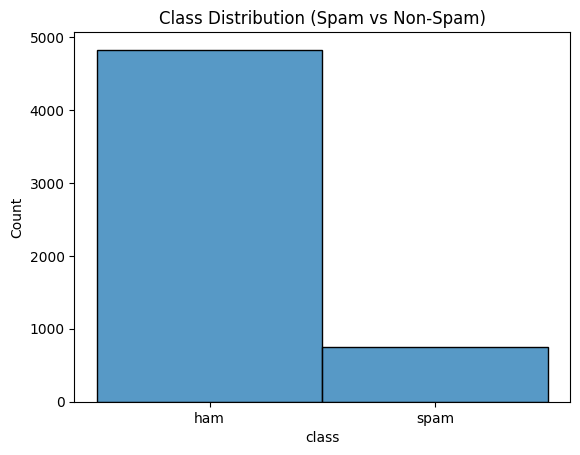

In [8]:
sns.histplot(x='class', data=df, palette="viridis")
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("class")
plt.ylabel("Count")
plt.show()

# FEATURE ENGINEERING

In [9]:
import nltk

In [10]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['num_chars'] = df['msg'].apply(len)
df.head()

,class,msg,num_chars
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
df['num_words'] = df['msg'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,class,msg,num_chars,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,23
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [13]:
df['num_sentences']=df['msg'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,class,msg,num_chars,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,23
1,ham,Ok lar... Joking wif u oni...,29,8,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,ham,U dun say so early hor... U c already then say...,49,13,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [14]:
numeric_columns=df.select_dtypes(include=[np.number])
numeric_columns

,num_chars,num_words,num_sentences
0,111,23,23
1,29,8,8
2,155,37,37
3,49,13,13
4,61,15,15
...,...,...,...
5567,161,35,35
5568,37,9,9
5569,57,15,15
5570,125,27,27


<Axes: >

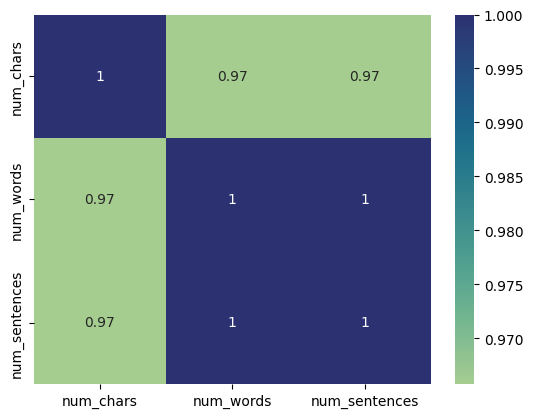

In [15]:
sns.heatmap(numeric_columns.corr(), annot=True, cmap='crest')

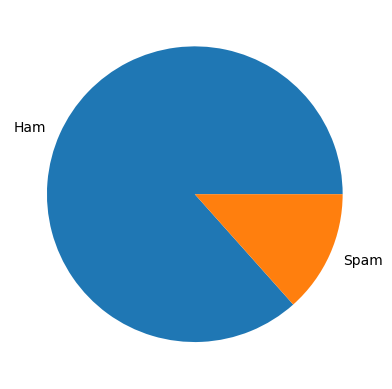

In [16]:
plt.pie(df['class'].value_counts(),labels=['Ham','Spam'])
plt.show()

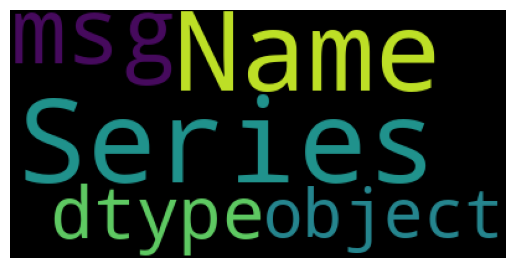

In [17]:
from wordcloud import WordCloud
text=str(df[df["class"]==1]["msg"])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
from nltk.corpus import stopwords

In [19]:
sw=stopwords.words('english')
import string 
punc=string.punctuation 
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()

In [20]:
def transform_text(text):
    l=[]
    text=text.lower()
    text=nltk.word_tokenize(text)
    for i in text:
        if i.isalnum():
            l.append(i)
    text=l[:]#clone of list above
    l.clear()
    for i in text:
        if i not in sw and i not in punc:
            l.append(ps.stem(i))
    return "".join(l)

In [21]:
transform_text("Hi my name is Sahan . How are you doing?")

'hinamesahan'

In [22]:
df['trf_text'] = df['msg'].apply(transform_text)
df

,class,msg,num_chars,num_words,num_sentences,trf_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,23,gojurongpointavailbugingreatworldlaebuffetcine...
1,ham,Ok lar... Joking wif u oni...,29,8,8,oklarjokewifuoni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,freeentri2wklicompwinfacupfinaltkt21stmaytextf...
3,ham,U dun say so early hor... U c already then say...,49,13,13,udunsayearlihorucalreadisay
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nahthinkgoeusflivearoundthough
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,35,2ndtimetri2contactupoundprize2claimeasicall087...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,9,bgoesplanadfrhome
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,15,pitimoodsuggest
5570,ham,The guy did some bitching but I acted like i'd...,125,27,27,guybitchactlikeinterestbuysomethelsnextweekgav...


In [23]:
wc=WordCloud(width=500,background_color='green',height=500,min_font_size=1)

In [24]:
spam_text = df[df['class'] == 1]['trf_text'].str.cat(sep=" ")
print(f"Spam text length: {len(spam_text)}")
print(spam_text)


Spam text length: 0



# MODEL SELECTION

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    

In [26]:
cv = CountVectorizer()  
tfid = TfidfVectorizer(max_features=3000) 

    

In [27]:
X = tfid.fit_transform(df['trf_text']).toarray()
y=df['class']


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB
bnb_model=BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()